In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
EV_Vehicles = pd.read_csv("/content/Electric Vehicle Sales by State in India.csv")

In [ ]:
EV_Vehicles.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [ ]:
EV_Vehicles['Date'] = pd.to_datetime(EV_Vehicles['Date'])
EV_Vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  float64       
 1   Month_Name         96845 non-null  object        
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  object        
 4   Vehicle_Class      96845 non-null  object        
 5   Vehicle_Category   96845 non-null  object        
 6   Vehicle_Type       96845 non-null  object        
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 5.9+ MB


In [ ]:
df = EV_Vehicles.drop(columns=["Date"])

In [ ]:
EV_Vehicles_encoded = pd.get_dummies(EV_Vehicles, columns=['State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type'],
drop_first=True)

In [ ]:
categorical_columns = ['State', 'Vehicle_Class',
'Vehicle_Category', 'Vehicle_Type']
EV_Vehicles[categorical_columns] = EV_Vehicles[categorical_columns].astype('category')

/tmp/ipython-input-205056992.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Year", y="EV_Sales_Quantity", hue="Vehicle_Type", data=EV_Vehicles, ci=None)


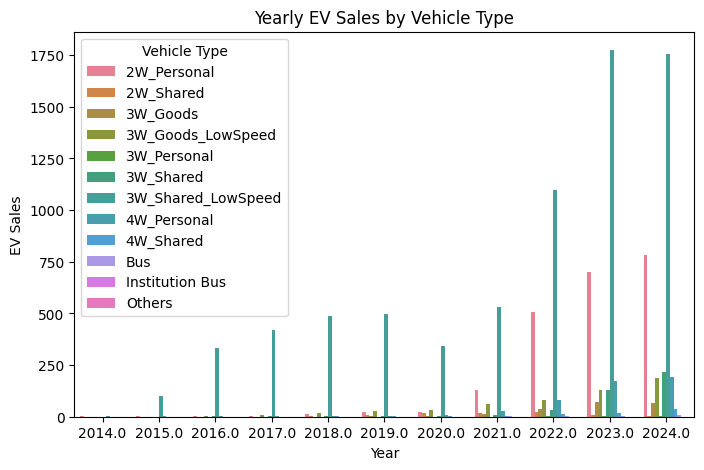

In [ ]:
# Market Trend Analysis (Bar Plot: Yearly EV Sales by Vehicle Type)
plt.figure(figsize=(8,5))
plt.title("Yearly EV Sales by Vehicle Type")
sns.barplot(x="Year", y="EV_Sales_Quantity", hue="Vehicle_Type", data=EV_Vehicles, ci=None)
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.legend(title="Vehicle Type")
plt.show()



/tmp/ipython-input-67370718.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = EV_Vehicles.pivot_table(


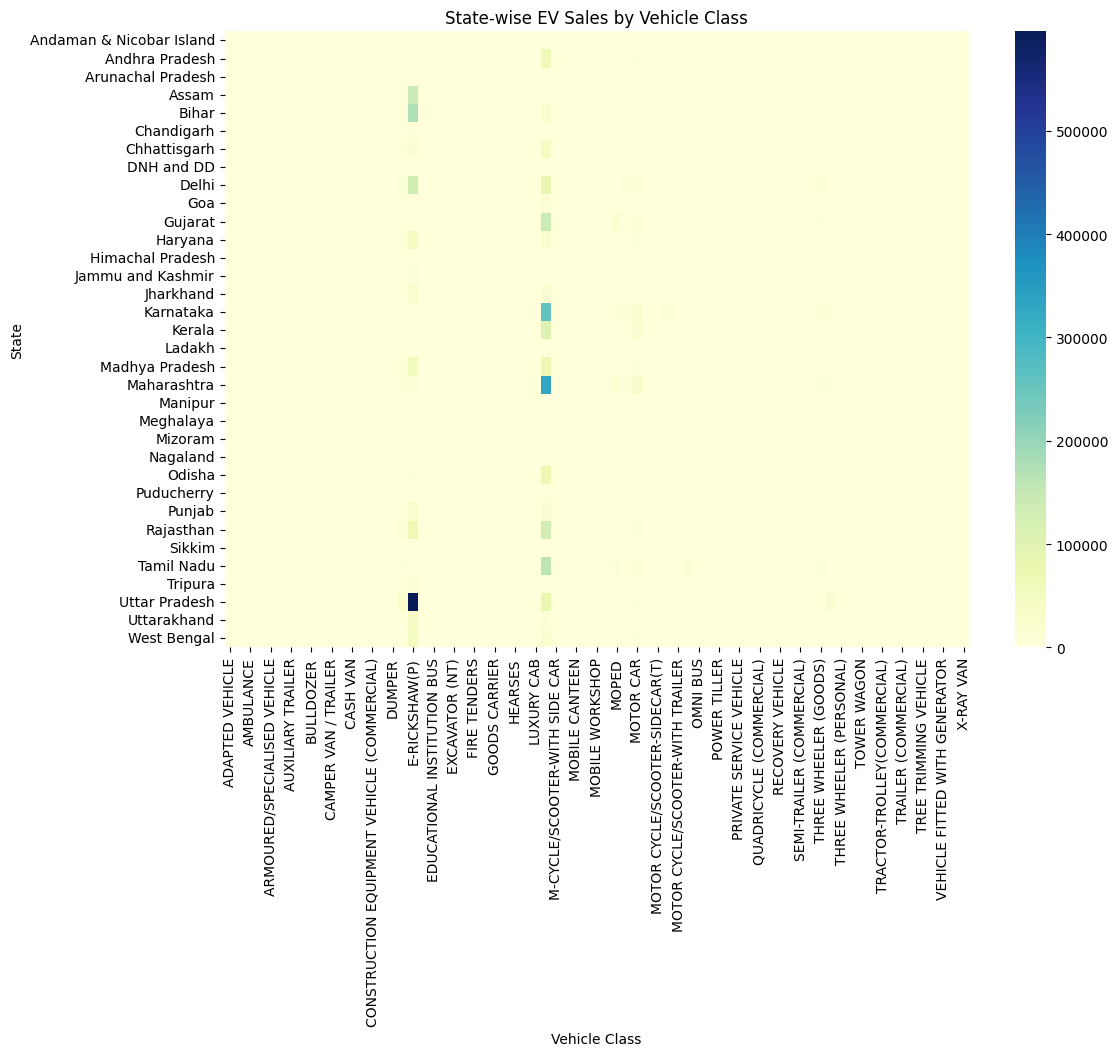

In [ ]:
#Infrastructure Planning (Heatmap: State vs Vehicle Class Sales)
pivot_table = EV_Vehicles.pivot_table(
    index="State", columns="Vehicle_Class", values="EV_Sales_Quantity", aggfunc="sum"
)

plt.figure(figsize=(12,8))
plt.title("State-wise EV Sales by Vehicle Class")
sns.heatmap(pivot_table, cmap="YlGnBu", annot=False, cbar=True)
plt.xlabel("Vehicle Class")
plt.ylabel("State")
plt.show()


/tmp/ipython-input-1262658941.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  EV_Vehicles.groupby("Vehicle_Category")["EV_Sales_Quantity"].sum().plot(


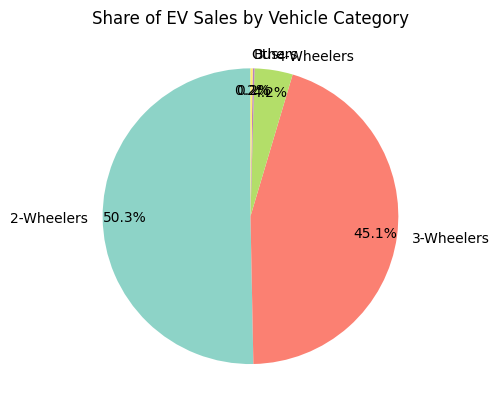

In [ ]:
# plt.figure(figsize=(7,7))
EV_Vehicles.groupby("Vehicle_Category")["EV_Sales_Quantity"].sum().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colormap="Set3",
    pctdistance=0.85,     # move % labels outward
    labeldistance=1.1     # move category labels outward
)
plt.title("Share of EV Sales by Vehicle Category")
plt.ylabel("")
plt.show()


In [ ]:
# Import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

In [ ]:
# Features (X) and target (y)
X = df.drop("EV_Sales_Quantity", axis=1)
y = df["EV_Sales_Quantity"]

In [ ]:
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(include=["float64", "int64"]).columns.tolist()

In [ ]:
# Preprocessor: One-hot encode categorical, passthrough numeric
preprocessor = ColumnTransformer(
transformers=[
("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
("num", "passthrough", num_cols)
]
)

In [ ]:
# Try 3 models
models = {
"Linear Regression": LinearRegression(),
"Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
"Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Month_Name', 'State',
                                                   'Vehicle_Class',
                                                   'Vehicle_Category',
                                                   'Vehicle_Type']),
                                                 ('num', 'passthrough',
                                                  ['Year'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
results[name] = {"RMSE": rmse, "R2": r2}

In [ ]:
results

{'Gradient Boosting': {'RMSE': np.float64(261.3353727660126),
  'R2': 0.7377326131135572}}

In [ ]:
pipeline.named_steps['model'].feature_importances_

array([0.00000000e+00, 0.00000000e+00, 2.91788832e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.99623095e-04, 0.00000000e+00, 0.00000000e+00,
       5.69357364e-05, 0.00000000e+00, 0.00000000e+00, 8.60926223e-03,
       1.40508168e-02, 1.40161405e-04, 0.00000000e+00, 3.32485303e-05,
       3.49965683e-03, 0.00000000e+00, 8.25377171e-04, 0.00000000e+00,
       2.23551037e-05, 3.56227770e-05, 0.00000000e+00, 4.48437154e-02,
       1.14448023e-04, 9.63970124e-05, 4.31277587e-05, 1.67512156e-01,
       1.25064108e-04, 8.18171102e-06, 5.23394296e-05, 5.35666512e-05,
       0.00000000e+00, 5.48322366e-05, 0.00000000e+00, 2.41184612e-04,
       5.84243577e-05, 3.88460051e-04, 8.55980409e-05, 2.02532116e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

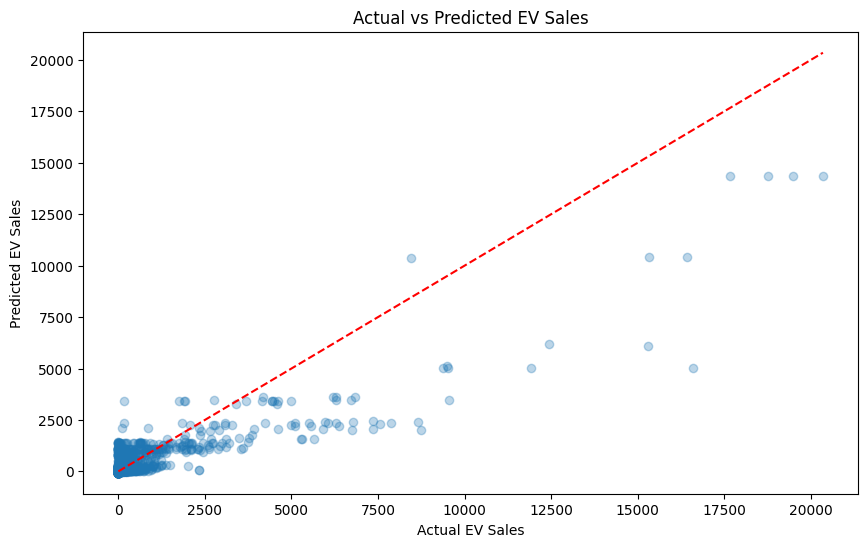

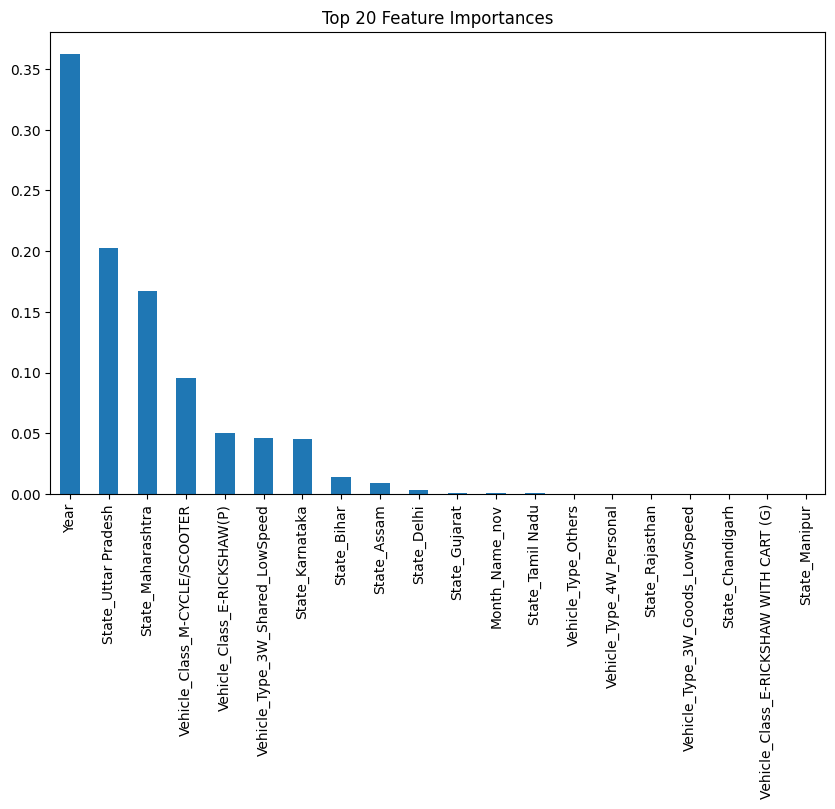

In [ ]:
import matplotlib.pyplot as plt

# Predictions from your best model (Gradient Boosting pipeline)
best_pipeline = pipeline  # assuming pipeline was last fit with GradientBoosting
y_pred = best_pipeline.predict(X_test)

# --- Plot Actual vs Predicted ---
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.title('Actual vs Predicted EV Sales')
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.show()

# --- Feature Importance ---
# Extract feature importances from the model
model = best_pipeline.named_steps["model"]
encoder = best_pipeline.named_steps["preprocessor"].named_transformers_["cat"]

# Get encoded categorical feature names
cat_features = encoder.get_feature_names_out(cat_cols)
all_features = list(cat_features) + num_cols

# Match importances
importances = pd.Series(model.feature_importances_, index=all_features)

# Plot top 20 important features
plt.figure(figsize=(10, 6))
importances.sort_values(ascending=False).head(20).plot(kind="bar")
plt.title("Top 20 Feature Importances")
plt.show()
